In [54]:
import pandas as pd

df_customers = pd.read_csv("telco-churn.csv")
display(df)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [55]:
# Visualizando informações dos dados
display(df_customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [56]:
import numpy as np 

customer_list = df_customers["customerID"].unique()

reasons_contacts = [
    "Dúvida sobre fatura",
    "Lentidão na internet",
    "Serviço indisponível",
    "Mudança de plano",
    "Problema técnico"
]
# Vamos criar uma lista de dicionários para simular os registros de chamadas
calls_sup = []
for customer_id in customer_list:
    # Vamos simular que cada cliente pode ter feito de 0 a 4 chamadas
    # Range baseado em três conceitos importantes: realismo, criação de variação e a hipótese de negócio.
    # Vamos criar um gráfico que cruza o número de chamadas com a taxa de churn e, muito provavelmente, veremos essa relação na prática
    num_calls = np.random.randint(0, 5)
    for _ in range(num_calls):
        calls_sup.append({
            'customerID': customer_id,
            'motivo':  np.random.choice(reasons_contacts)
        })

df_sup = pd.DataFrame(calls_sup)
display(df_sup.head())
# Quantos registros de chamadas criamos no total?
print(f"\nTotal de registros de chamadas de suporte simuladas: {len(df_sup)}")

,customerID,motivo
0,7590-VHVEG,Serviço indisponível
1,7590-VHVEG,Mudança de plano
2,7590-VHVEG,Mudança de plano
3,7590-VHVEG,Lentidão na internet
4,5575-GNVDE,Serviço indisponível



Total de registros de chamadas de suporte simuladas: 14184


In [57]:
# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Agregando dados de suporte
# Contando quantas chamadas cada cliente fez
count_calls = df_sup.groupby('customerID').size().reset_index(name='NumeroDeChamadas')

# Juntar a informação ao dataframe principal
# left merge para garantir que todos os clientes do dataframe original sejam mantidos
df_completed = pd.merge(df_customers, count_calls, on='customerID', how='left')
# Se um cliente nunca fez uma ligação, o merge resulta em NaN, por isso vamos preencher com 0
df_completed['NumeroDeChamadas'].fillna(0, inplace=True)
# A coluna TotalCharges tem alguns espaços em branco para clientes novos que ainda não foram cobrados.
# pd.to_numeric vai transformar os números em números e os espaços em 'NaN' (se usarmos o errors='coerce')
df_completed['TotalCharges'] = pd.to_numeric(df_completed['TotalCharges'], errors='coerce')
# Vamos preencher os valores nulos. Uma abordagem razoável é preencher com 0,
# já que são clientes que ainda não tiveram cobranças.
df_completed['TotalCharges'].fillna(0, inplace=True)

# Converter a nova coluna para o tipo inteiro
df_completed['NumeroDeChamadas'] = df_completed['NumeroDeChamadas'].astype(int)
display(df_completed[['customerID', 'Churn', 'NumeroDeChamadas']].head())

C:\Users\N-1834\AppData\Local\Temp\ipykernel_18608\3551442059.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_completed['NumeroDeChamadas'].fillna(0, inplace=True)
C:\Users\N-1834\AppData\Local\Temp\ipykernel_18608\3551442059.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,customerID,Churn,NumeroDeChamadas
0,7590-VHVEG,No,4
1,5575-GNVDE,No,3
2,3668-QPYBK,Yes,0
3,7795-CFOCW,No,1
4,9237-HQITU,Yes,4


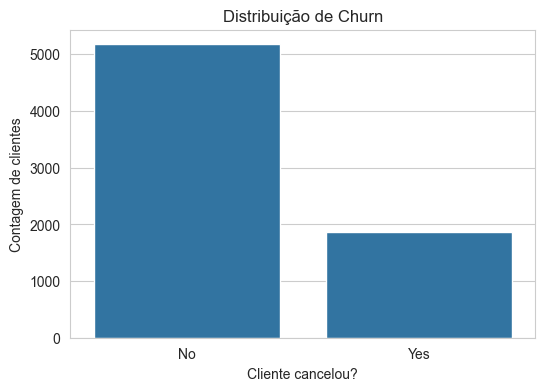

Taxa de Churn: 26.54%
Taxa de Retenção: 73.46%


In [58]:
# Configurando o estilo dos gráficos
sns.set_style("whitegrid")

# Criando o gráfico
plt.figure(figsize=(6, 4))
sns.countplot(data=df_completed, x='Churn')
plt.title("Distribuição de Churn")
plt.xlabel("Cliente cancelou?")
plt.ylabel("Contagem de clientes")
plt.show()

# Calculando a porcentagem
churn_rate = df_completed['Churn'].value_counts(normalize=True) * 100
print(f"Taxa de Churn: {churn_rate['Yes']:.2f}%")
print(f"Taxa de Retenção: {churn_rate['No']:.2f}%")

In [59]:
import pandas as pd
import numpy as np
import random

# Carregar o dataset original
df_customers = pd.read_csv("telco-churn.csv")

# FUNÇÃO CORRETA PARA SIMULAR CHAMADAS (Lógica 2)
def simular_chamadas_por_churn(status_churn):
    if status_churn == 'No':
        # Clientes que ficaram: maior chance de ter poucas chamadas.
        return random.choices([0, 1, 2, 3], weights=[0.6, 0.3, 0.08, 0.02], k=1)[0]
    else: # se status_churn == 'Yes'
        # Clientes que cancelaram: maior chance de ter muitas chamadas.
        return random.choices([1, 2, 3, 4], weights=[0.1, 0.3, 0.4, 0.2], k=1)[0]

# Aplicar a função para criar a coluna 'NumeroDeChamadas' desde o início
df_customers['NumeroDeChamadas'] = df_customers['Churn'].apply(simular_chamadas_por_churn)

print("DataFrame com a coluna 'NumeroDeChamadas' criada da forma correta:")
display(df_customers[['customerID', 'Churn', 'NumeroDeChamadas']].head())

DataFrame com a coluna 'NumeroDeChamadas' criada da forma correta:


,customerID,Churn,NumeroDeChamadas
0,7590-VHVEG,No,0
1,5575-GNVDE,No,0
2,3668-QPYBK,Yes,2
3,7795-CFOCW,No,1
4,9237-HQITU,Yes,3


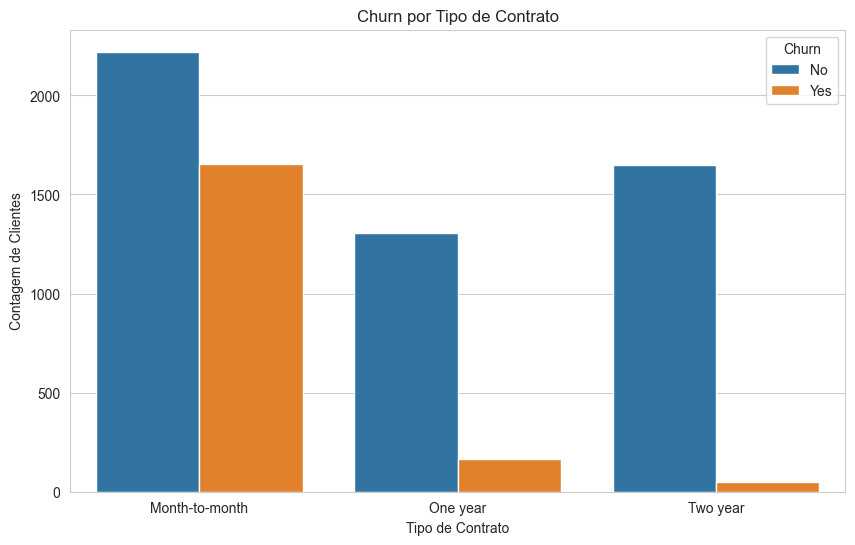

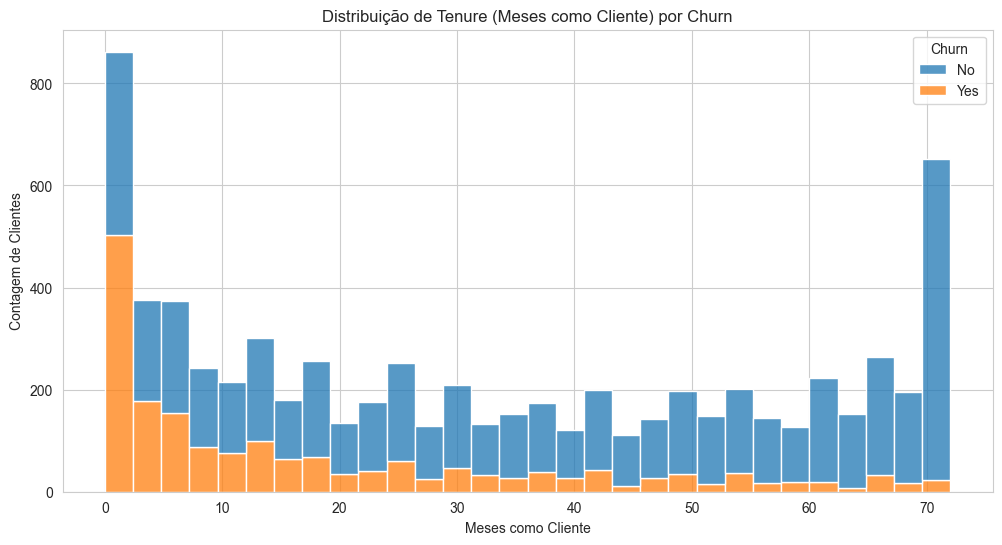

In [60]:
# Relação entre o tipo de contrato e o churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_completed, x='Contract', hue='Churn', order=['Month-to-month', 'One year', 'Two year'])
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem de Clientes')
plt.show()

# Relação entre o tempo de contrato (tenure) e o churn
plt.figure(figsize=(12, 6))
sns.histplot(data=df_completed, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribuição de Tenure (Meses como Cliente) por Churn')
plt.xlabel('Meses como Cliente')
plt.ylabel('Contagem de Clientes')
plt.show()

In [61]:
# Modelos de Machine Learning não entendem texto
# Eles só entendem números. Além disso, eles funcionam melhor quando os dados numéricos estão em uma escala semelhante
# Features (X) = dados para fazer previsões
# Target (Y) = o que deve ser previsto

# Convertendo a coluna Churn de "sim" e "não" para 1/0
df_completed['Churn'] = df_completed['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
# Criar X e Y
x = df_completed.drop(['customerID', 'Churn'], axis=1)
y = df_completed['Churn']

print(x.shape)
print(y.shape)

(7043, 20)
(7043,)


In [62]:
# Usando One-Hot Encoding, que transforma cada categoria em uma nova coluna do tipo 0 ou 1.
# Exemplo: a coluna Contract com valores ("Month-to-month", "One year", "Two year") 
# se transformará em 3 novas colunas: Contract_Month-to-month, Contract_One year, e Contract_Two year. 
# Se o cliente for do tipo "One year", ele terá o valor 1 nessa coluna e 0 nas outras duas.
x_encoded = pd.get_dummies(x, drop_first=True)
print(x_encoded.shape)
print(x_encoded.head())

(7043, 31)
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  NumeroDeChamadas  \
0              0       1           29.85         29.85                 4   
1              0      34           56.95       1889.50                 3   
2              0       2           53.85        108.15                 0   
3              0      45           42.30       1840.75                 1   
4              0       2           70.70        151.65                 4   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True           False             False   
1         True        False           False              True   
2         True        False           False              True   
3         True        False           False             False   
4        False        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            

In [63]:
# Dividindo os dados em treino e teste
# Boas práticas: treino cerca de 70-80% e testes 20-30%
from sklearn.model_selection import train_test_split
# Dividindo os dados
# test_size=0.2 significa que 20% dos dados irão para teste
# random_state=42 garante que a divisão seja a mesma toda vez que rodarmos o código, para reprodutibilidade
# A ordem abaixo importa, o nome das variáveis não
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42, stratify=y)
print("Tamanho do conjunto de treino:", x_train.shape)
print("Tamanho do conjunto de teste:", x_test.shape)

Tamanho do conjunto de treino: (5634, 31)
Tamanho do conjunto de teste: (1409, 31)


In [64]:
# StandardScaler para padronizar tudo, colocando os dados em uma escala semelhante (com média 0 e desvio padrão 1)
# (fit) o scaler apenas nos dados de treino e depois o aplicamos (transform) nos dados de treino e de teste
# Isso evita o "vazamento de dados" (data leakage) do conjunto de teste para o de treino.
from sklearn.preprocessing import StandardScaler
# Identificar as colunas que são numéricas (e não resultado do one-hot encoding)
nums_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumeroDeChamadas', ]
# Criar o objeto scaler
scaler = StandardScaler()
# Ajustar e transformar os dados de treino
x_train[nums_columns] = scaler.fit_transform(x_train[nums_columns])

# Apenas transformar os dados de teste (usando o ajuste feito no treino)
x_test[nums_columns] = scaler.transform(x_test[nums_columns])
print(x_train.head())


      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  NumeroDeChamadas  \
3738              0  0.102371       -0.521976     -0.262257         -0.717133   
3151              0 -0.711743        0.337478     -0.503635          0.700028   
4860              0 -0.793155       -0.809013     -0.749883         -1.425713   
3867              0 -0.263980        0.284384     -0.172722         -1.425713   
3810              0 -1.281624       -0.676279     -0.989374         -0.008552   

      gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
3738         True        False           False             False   
3151         True         True            True              True   
4860         True         True            True             False   
3867        False         True           False              True   
3810         True         True            True              True   

      MultipleLines_No phone service  ...  StreamingTV_No internet service  \
3738                      

### Resultados da Regressão Logística ###
Acurácia: 0.8041

--- Relatório de Classificação ---
               precision    recall  f1-score   support

Não Churn (0)       0.85      0.89      0.87      1035
    Churn (1)       0.65      0.56      0.60       374

     accuracy                           0.80      1409
    macro avg       0.75      0.73      0.74      1409
 weighted avg       0.80      0.80      0.80      1409


--- Matriz de Confusão ---


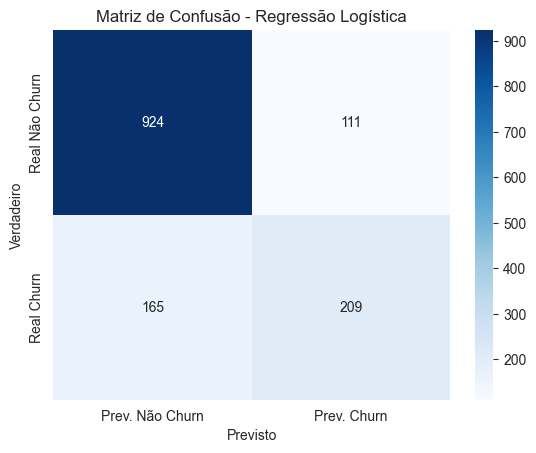

In [66]:
#Vamos treinar dois modelos para podermos comparar:
# Regressão Logística: Um modelo clássico, rápido e muito interpretável. Ótimo para ter um baseline e entender o impacto de cada feature.
# Random Forest (Floresta Aleatória): Um modelo mais poderoso e complexo, que geralmente entrega uma performance superior.

# Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Criar e treinar o modelo
# O 'solver' e 'max_iter' são parâmetros técnicos para ajudar o modelo a convergir
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(x_train, y_train)

# 2. Fazer previsões no conjunto de teste
y_pred_log_reg = log_reg.predict(x_test)

# 3. Avaliar o modelo
print("### Resultados da Regressão Logística ###")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred_log_reg, target_names=['Não Churn (0)', 'Churn (1)']))

# 4. Visualizando a Matriz de Confusão
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prev. Não Churn', 'Prev. Churn'], yticklabels=['Real Não Churn', 'Real Churn'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()